## 1. Import libraries

In [14]:
!pip install seaborn

In [15]:
!pip install wordcloud

In [16]:
import os

import wordcloud

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

import eda_helper_functions

from sklearn.ensemble import IsolationForest 


## 2. Import Data

In [17]:
train=pd.read_csv(r"C:\Users\Debasish Das\Desktop\Churn_prediction\Dataset\train.csv")
train

surname  creditscore geography  gender  age  tenure    balance  \
0      Ozoemena          365   Germany    Male   30       0  127760.07   
1         Henry          553     Spain    Male   38       1  181110.13   
2        Romani          778   Germany  Female   29       6  150358.97   
3          Wang          850    France    Male   42       0       0.00   
4          Sung          674   Germany  Female   36       6  100762.64   
...         ...          ...       ...     ...  ...     ...        ...   
6395    Howells          466    France  Female   30       3       0.00   
6396         Tu          789     Spain  Female   40       4       0.00   
6397  Nicholson          691    France    Male   28       1       0.00   
6398    Macadam          758     Spain    Male   35       5       0.00   
6399       Kang          545    France    Male   26       7       0.00   

      numofproducts  hascrcard  isactivemember  estimatedsalary  exited  
0                 1          1               0         81537.85       1  
1                 2          1               0        184544.59       0  
2                 1          1               0         62454.01       1  
3                 2          1               0         44165.84       0  
4                 1          1               0        182156.86       0  
...             ...        ...             ...              ...     ...  
6395              1          1               0        193984.60       0  
6396              2          1               0        137402.27       0  
6397              2          0               0         92865.41       0  
6398              2          1               0         95009.60       0  
6399              2          0               1        156598.23       0  

[6400 rows x 12 columns]

## 3. High Level Summery

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   surname          6400 non-null   object 
 1   creditscore      6400 non-null   int64  
 2   geography        6400 non-null   object 
 3   gender           6400 non-null   object 
 4   age              6400 non-null   int64  
 5   tenure           6400 non-null   int64  
 6   balance          6400 non-null   float64
 7   numofproducts    6400 non-null   int64  
 8   hascrcard        6400 non-null   int64  
 9   isactivemember   6400 non-null   int64  
 10  estimatedsalary  6400 non-null   float64
 11  exited           6400 non-null   int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 600.1+ KB


In [20]:
train.describe()

creditscore          age       tenure        balance  numofproducts  \
count  6400.000000  6400.000000  6400.000000    6400.000000    6400.000000   
mean    651.445625    38.935469     4.982188   76243.429923       1.533906   
std      96.333724    10.491905     2.879514   62539.512273       0.580810   
min     350.000000    18.000000     0.000000       0.000000       1.000000   
25%     585.000000    32.000000     2.000000       0.000000       1.000000   
50%     653.000000    37.000000     5.000000   96292.520000       1.000000   
75%     718.000000    44.000000     7.000000  127638.027500       2.000000   
max     850.000000    83.000000    10.000000  238387.560000       4.000000   

         hascrcard  isactivemember  estimatedsalary       exited  
count  6400.000000     6400.000000      6400.000000  6400.000000  
mean      0.702500        0.515938    100297.819319     0.205781  
std       0.457194        0.499785     57497.848304     0.404303  
min       0.000000        0.000000        90.070000     0.000000  
25%       0.000000        0.000000     51385.550000     0.000000  
50%       1.000000        1.000000    100038.165000     0.000000  
75%       1.000000        1.000000    149539.715000     0.000000  
max       1.000000        1.000000    199970.740000     1.000000

In [24]:
train.describe(include="O")

surname geography gender
count     6400      6400   6400
unique    2315         3      2
top      Smith    France   Male
freq        21      3218   3478

## 4. Pair plots

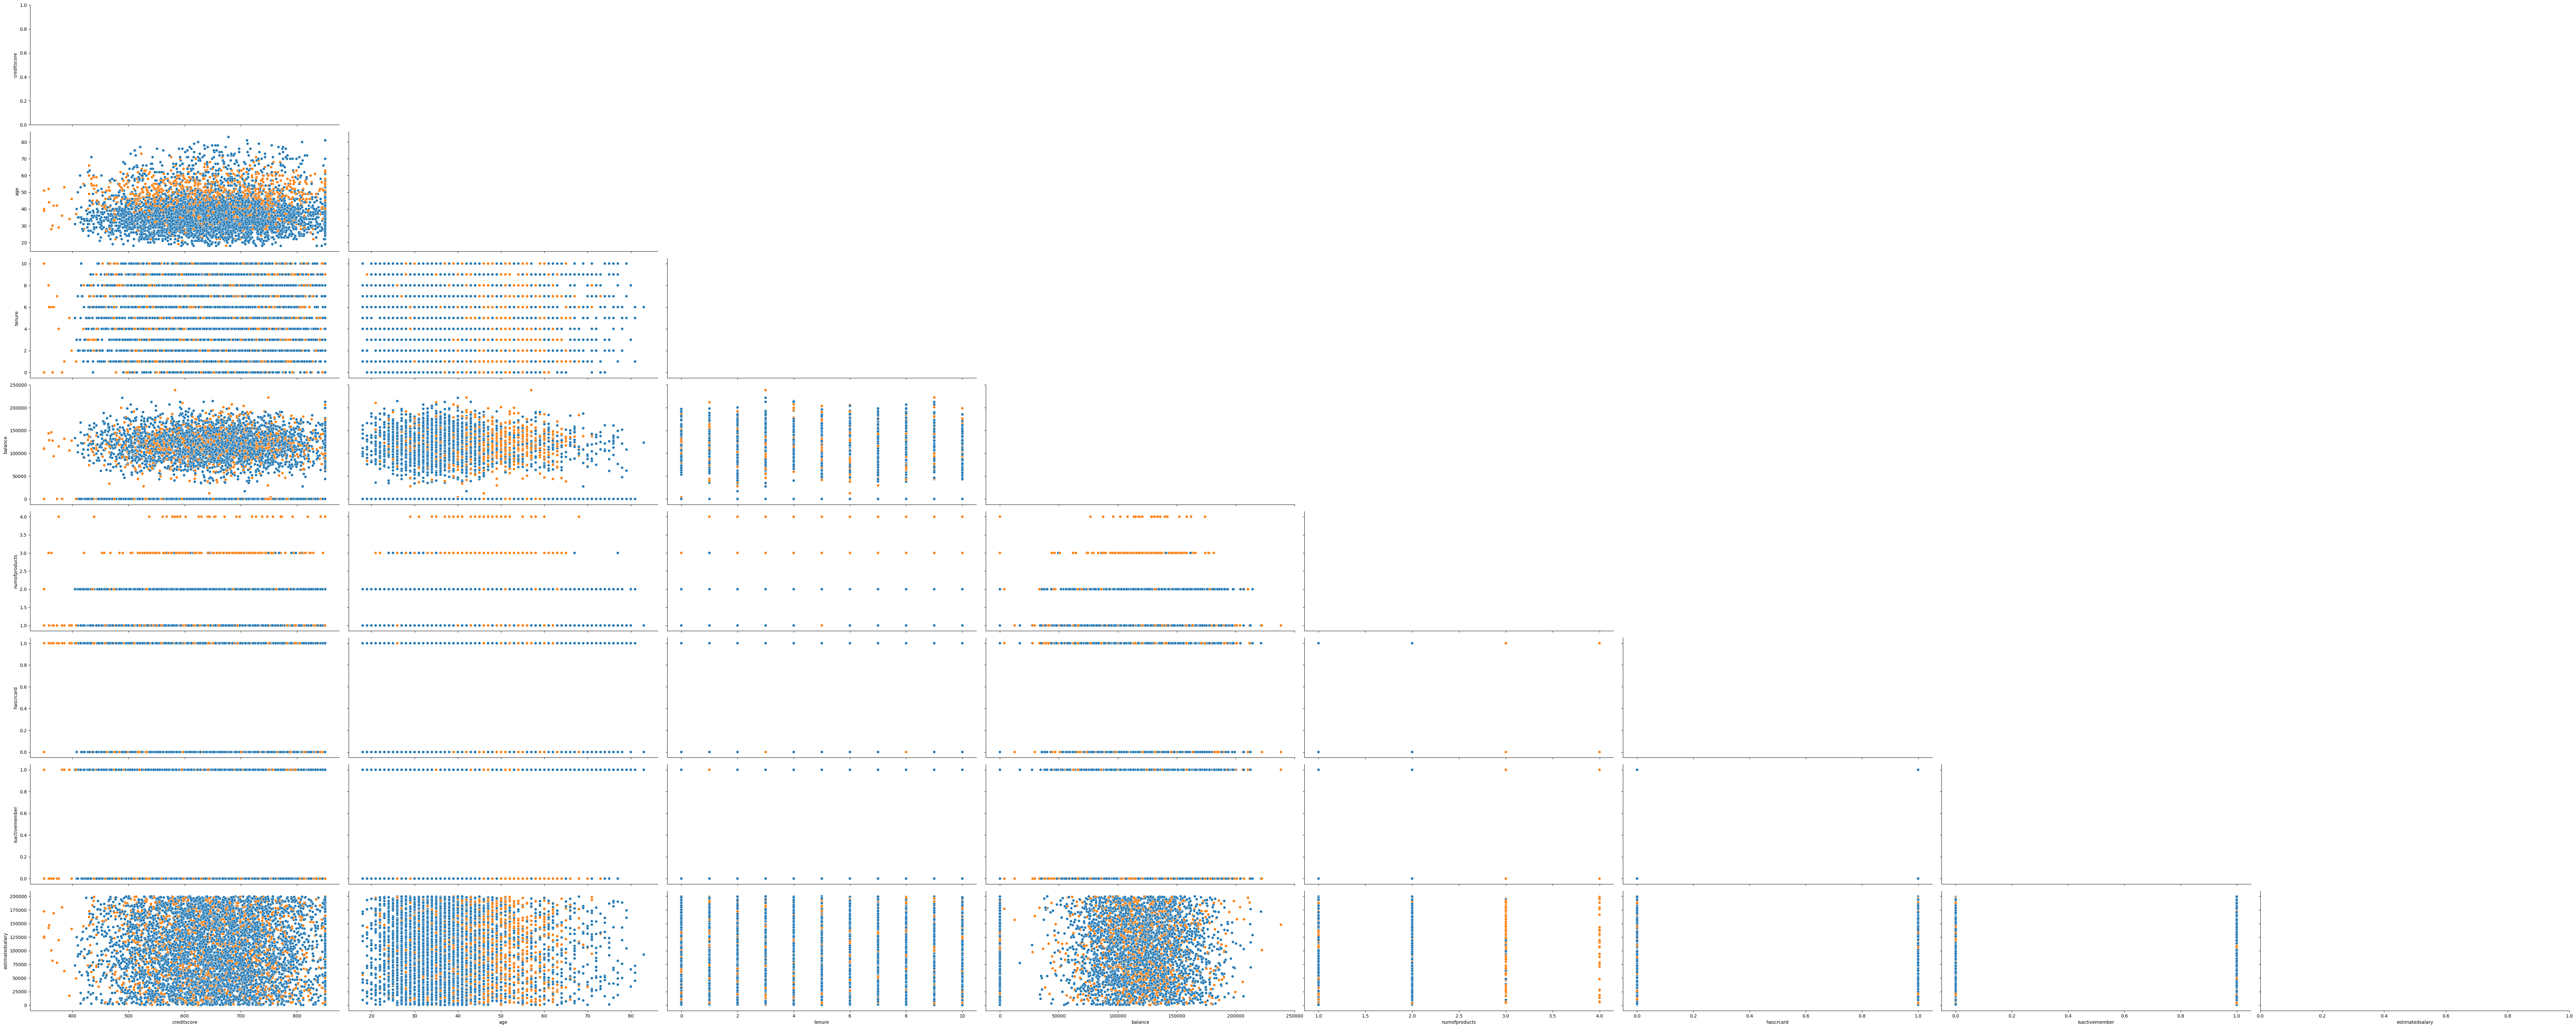

In [31]:
eda_helper_functions.pair_plots(train, 4,2.5,hue="exited")

## 5. Correlaton

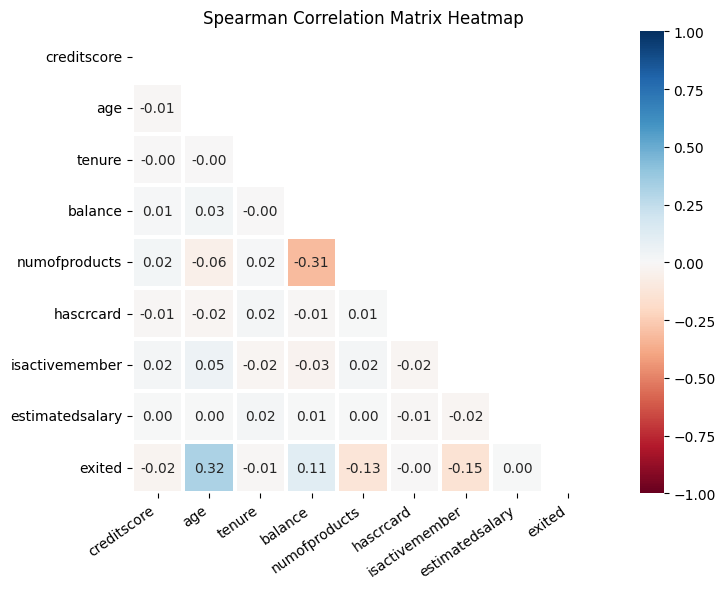

In [32]:
eda_helper_functions.correlation_heatmap(train)

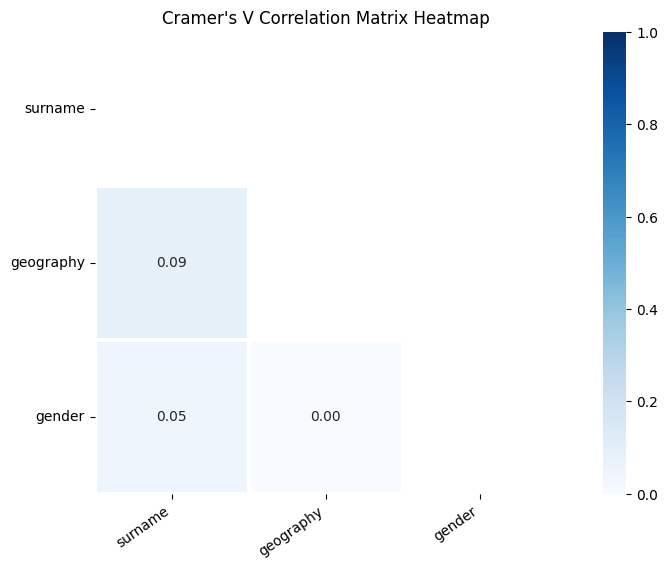

In [33]:
eda_helper_functions.cramersV_heatmap(train)

## 6.Detailed ananlysis of Each Feature

In [34]:
train.columns

Index(['surname', 'creditscore', 'geography', 'gender', 'age', 'tenure',
       'balance', 'numofproducts', 'hascrcard', 'isactivemember',
       'estimatedsalary', 'exited'],
      dtype='object')

In [76]:
def EDA(data, target):
    for col in data.columns:
        if data[col].dtype == "object" and len(data[col].unique())< 20:
            
            print(f"\n\n----------------------Analysis of {col}---------------------------\n\n")
            eda_helper_functions.cat_summary(data, col)
            eda_helper_functions.cat_univar_plots(data, col)
            eda_helper_functions.cat_bivar_plots(data, col, target)
            eda_helper_functions.num_cat_bivar_plots(data, target, col)
            eda_helper_functions.num_cat_hyp_testing(data, target, col)
            print(f"\n\n----------------------End Analysis of {col}---------------------------\n\n")
        elif data[col].dtype == "object" and len(data[col].unique()) > 20:
            # Skip processing for large categorical columns
            pass
        elif col==target:
            pass
        else:
            print(f"\n\n----------------------Analysis of {col}---------------------------\n\n")
            eda_helper_functions.num_summary(data, col)
            eda_helper_functions.num_univar_plots(data, col)
            eda_helper_functions.num_bivar_plots(data, col,target)
            eda_helper_functions.num_num_hyp_testing(data, col, target)
            print(f"\n\n----------------------End Analysis of {col}---------------------------\n\n")




----------------------Analysis of creditscore---------------------------




0       365
1       553
2       778
3       850
4       674
       ... 
6395    466
6396    789
6397    691
6398    758
6399    545
Name: creditscore, Length: 6400, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,400 / 6,400 rows


value
percentile       
0           350.0
5           492.0
10          523.0
25          585.0
50          653.0
75          718.0
90          778.0
95          813.0
99          850.0
100         850.0

value
mean                651.445625
trimmed mean (5%)   651.825694
trimmed mean (10%)  651.912500
median              653.000000

value
var            9280.186447
std              96.333724
IQR             133.000000
mad              67.000000
coef_variance     0.147877

value
skewness -0.074356
kurtosis -0.425760

Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 4.852394635636678e-16
Test Statistic       : 0.9938148359682084
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 3.786062202420908
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


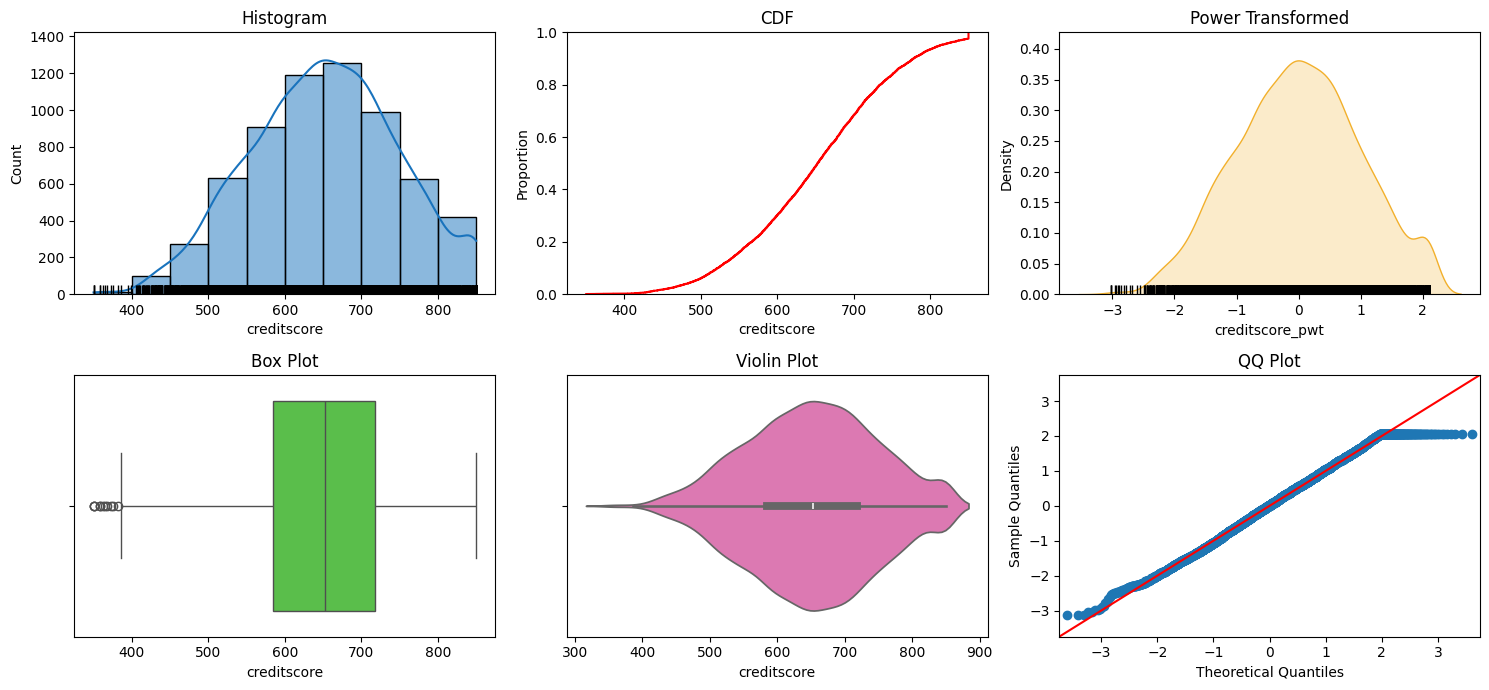

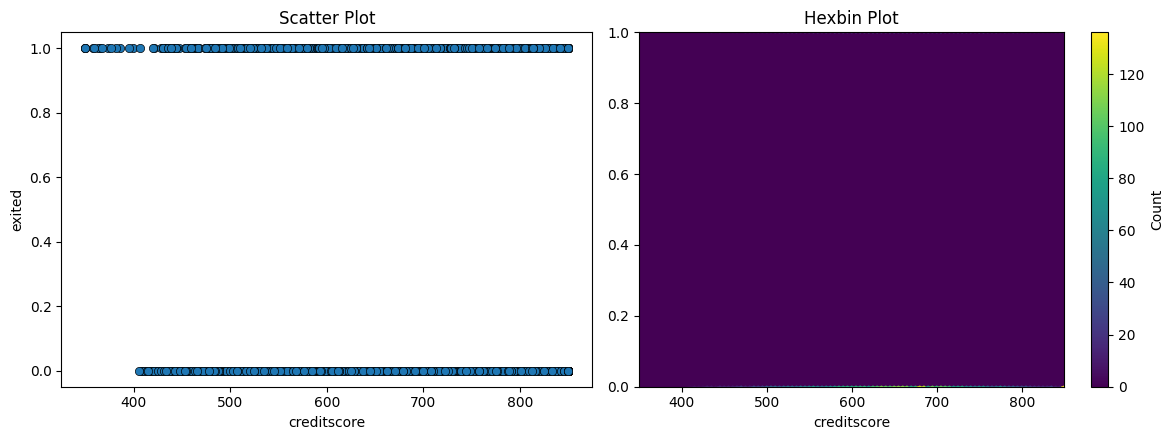

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : -0.02838316525577247
- p-value              : 0.023167136787208803
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables creditscore and exited are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : -0.024404833350840916
- p-value              : 0.050903065274207154
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables creditscore and exited are uncorrelated


----------------------End Analysis of creditscore---------------------------




----------------------Analysis of geography---------------------------




0       Germany
1         Spain
2       Germany
3        France
4       Germany
         ...   
6395     France
6396      Spain
6397     France
6398      Spain
6399     France
Name: geography, Length: 6400, dtype: object

Data Type      : object
Cardinality    : 3 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,400 / 6,400 rows


count     6400
unique       3
top     France
freq      3218

count  percentage
category                   
France     3218    0.502812
Germany    1613    0.252031
Spain      1569    0.245156

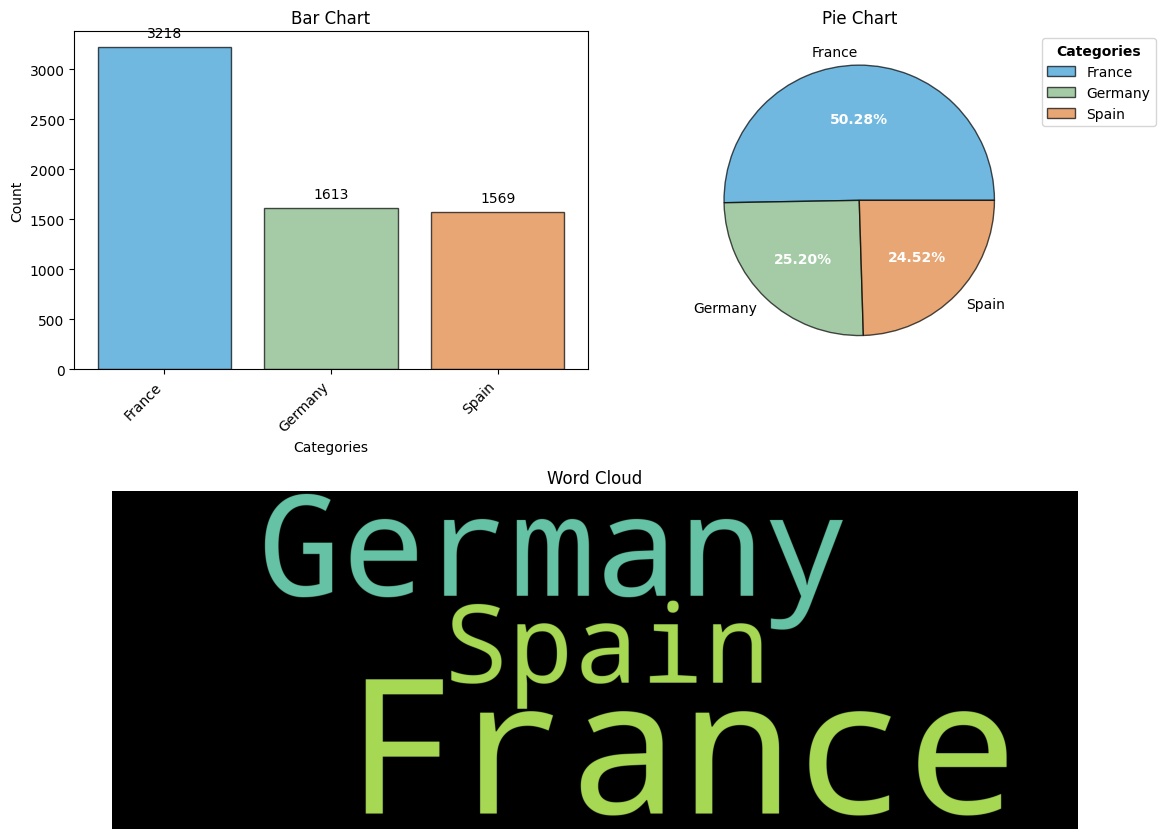

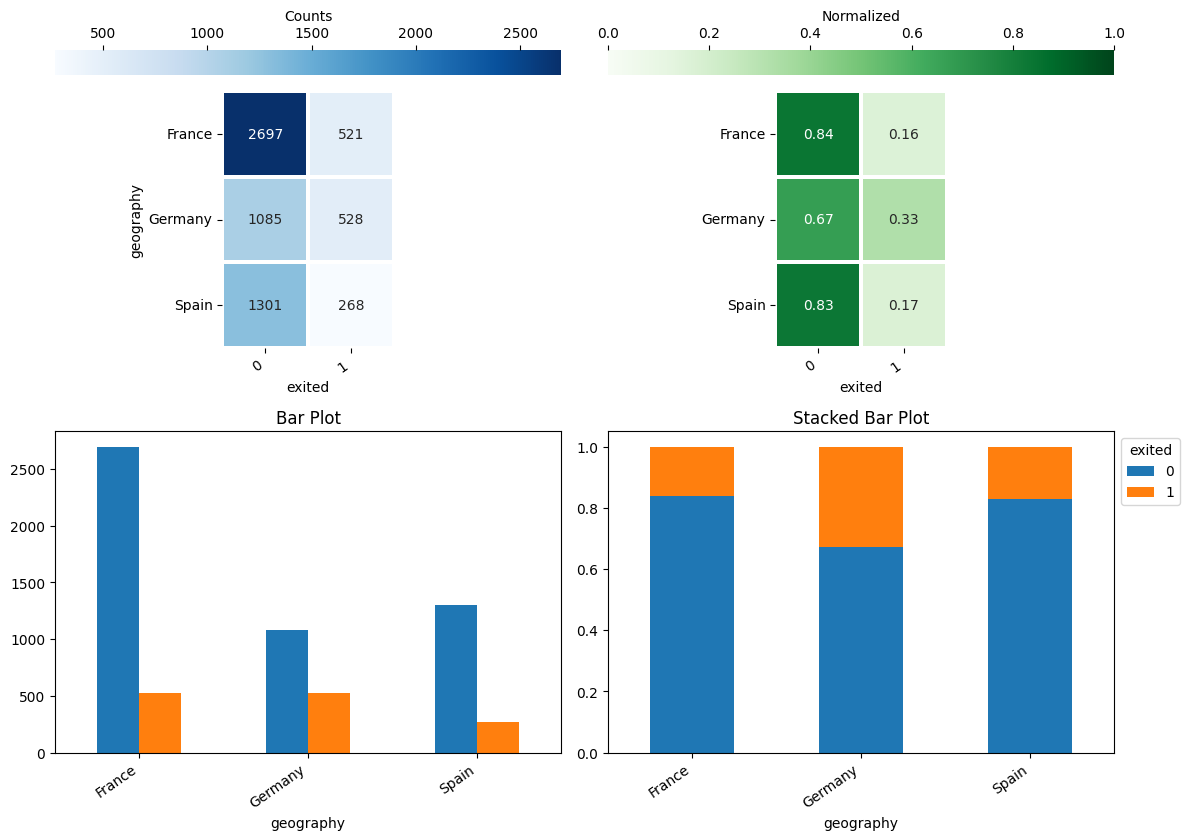

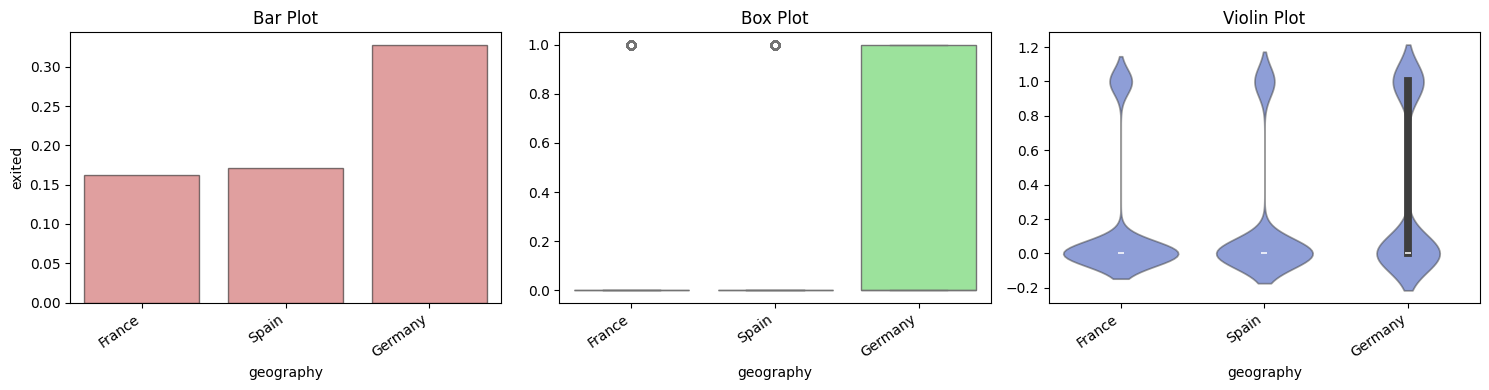

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 100.7761547920226
- p-value              : 8.10599493927834e-44
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables exited and geography are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 195.4569985229977
- p-value              : 3.606218575169277e-43
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables exited and geography are associated to each other


----------------------End Analysis of geography---------------------------




----------------------Analysis of gender---------------------------




0         Male
1         Male
2       Female
3         Male
4       Female
         ...  
6395    Female
6396    Female
6397      Male
6398      Male
6399      Male
Name: gender, Length: 6400, dtype: object

Data Type      : object
Cardinality    : 2 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,400 / 6,400 rows


count   6400
unique     2
top     Male
freq    3478

count  percentage
category                   
Male       3478    0.543438
Female     2922    0.456562

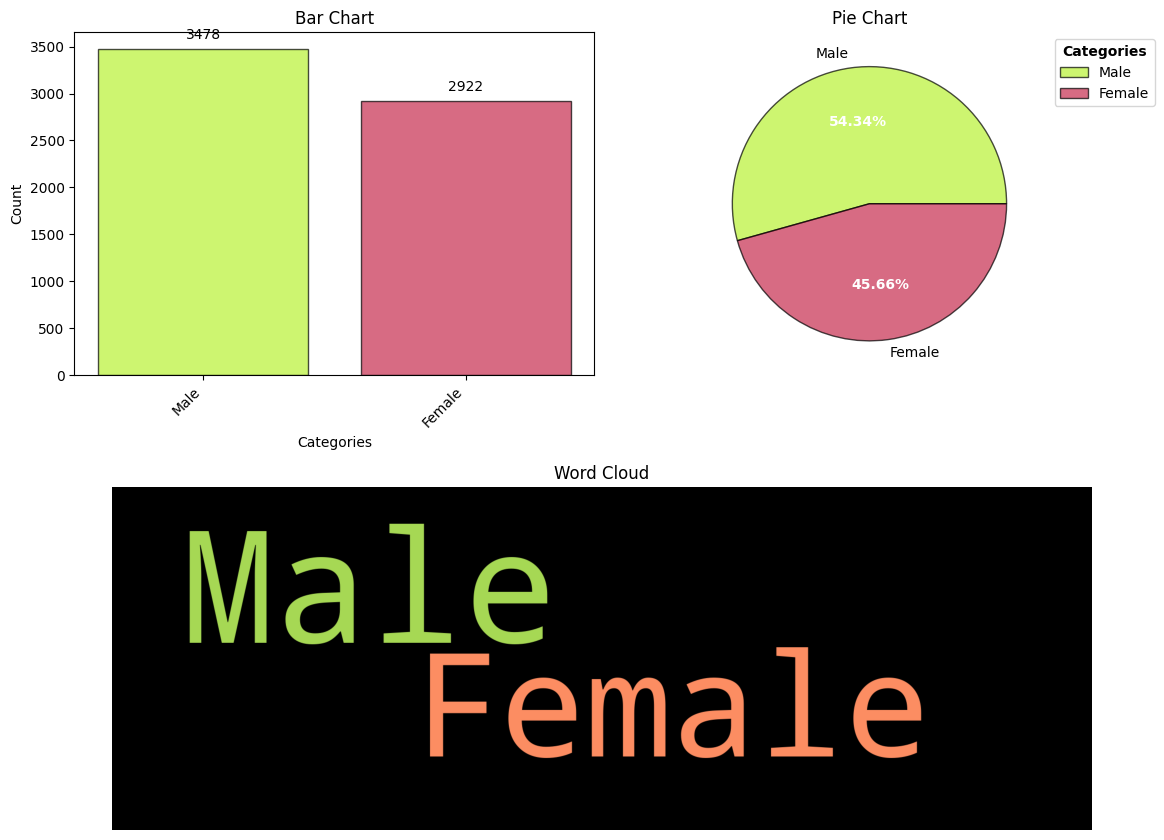

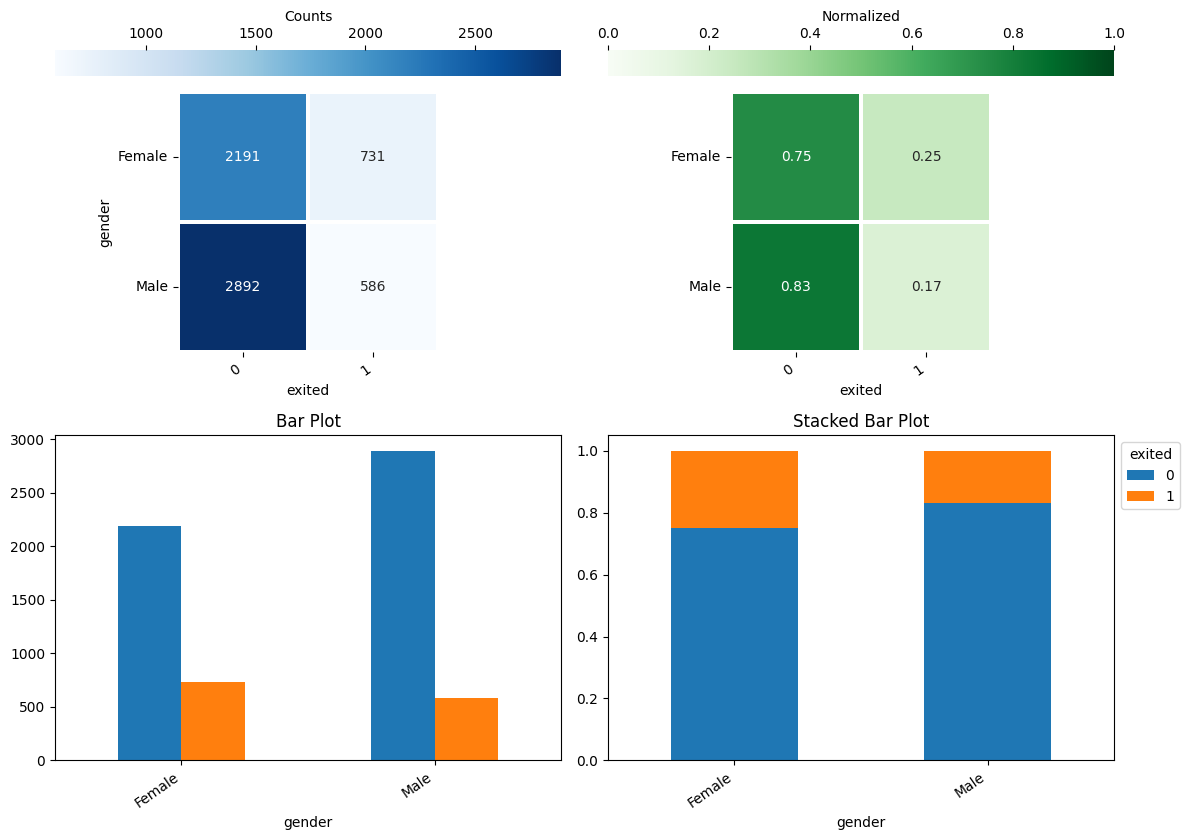

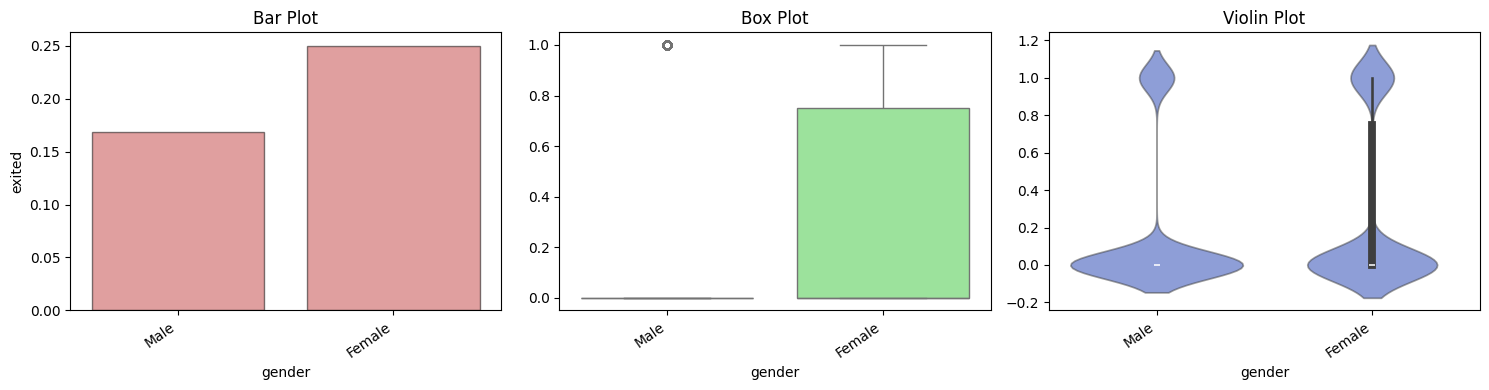

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 65.4693535750156
- p-value              : 7.006068199704115e-16
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables exited and gender are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 64.8163347900507
- p-value              : 8.221476997880129e-16
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables exited and gender are associated to each other


----------------------End Analysis of gender---------------------------




----------------------Analysis of age---------------------------




0       30
1       38
2       29
3       42
4       36
        ..
6395    30
6396    40
6397    28
6398    35
6399    26
Name: age, Length: 6400, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,400 / 6,400 rows


value
percentile       
0            18.0
5            25.0
10           27.0
25           32.0
50           37.0
75           44.0
90           53.0
95           60.0
99           72.0
100          83.0

value
mean                38.935469
trimmed mean (5%)   38.319097
trimmed mean (10%)  37.949219
median              37.000000

value
var            110.080067
std             10.491905
IQR             12.000000
mad              6.000000
coef_variance    0.269469

value
skewness  0.967468
kurtosis  1.192846

Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 4.130468557043971e-43
Test Statistic       : 0.9468862803597378
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 88.22547632768146
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


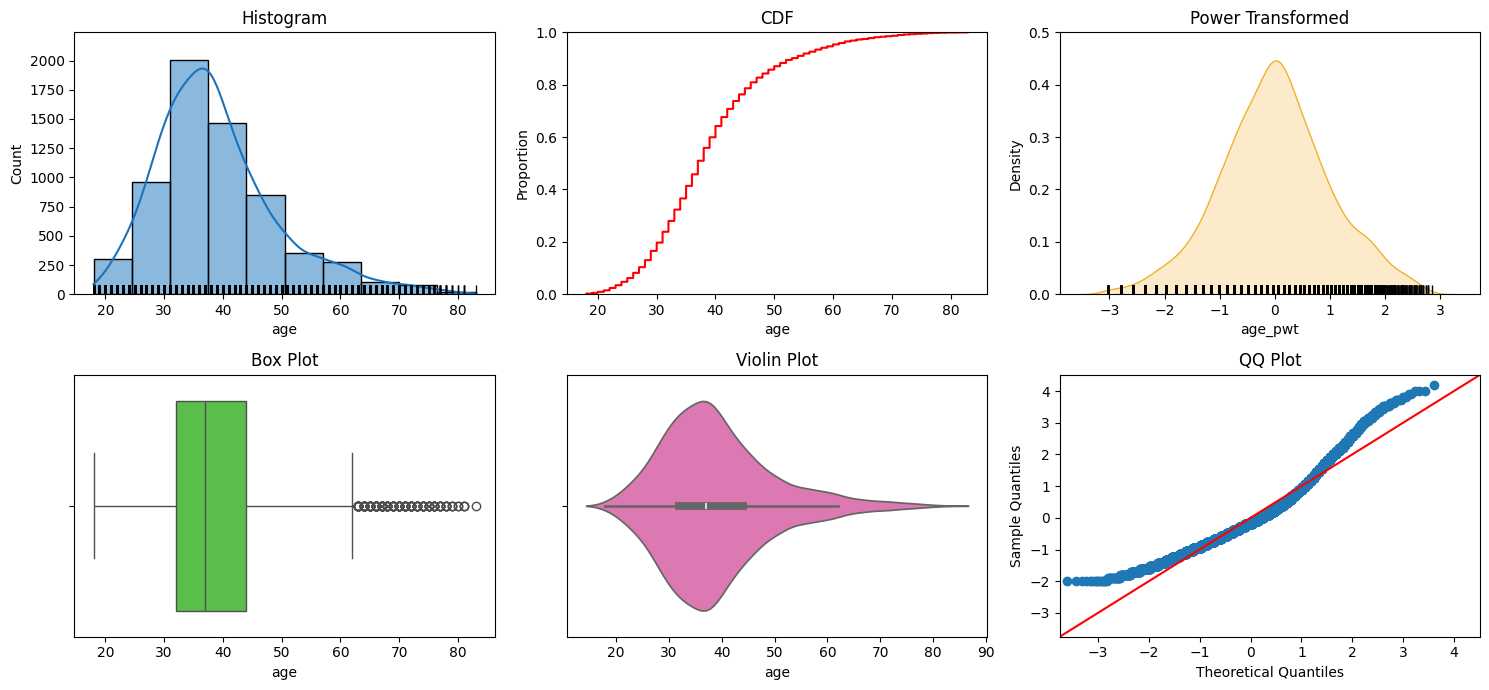

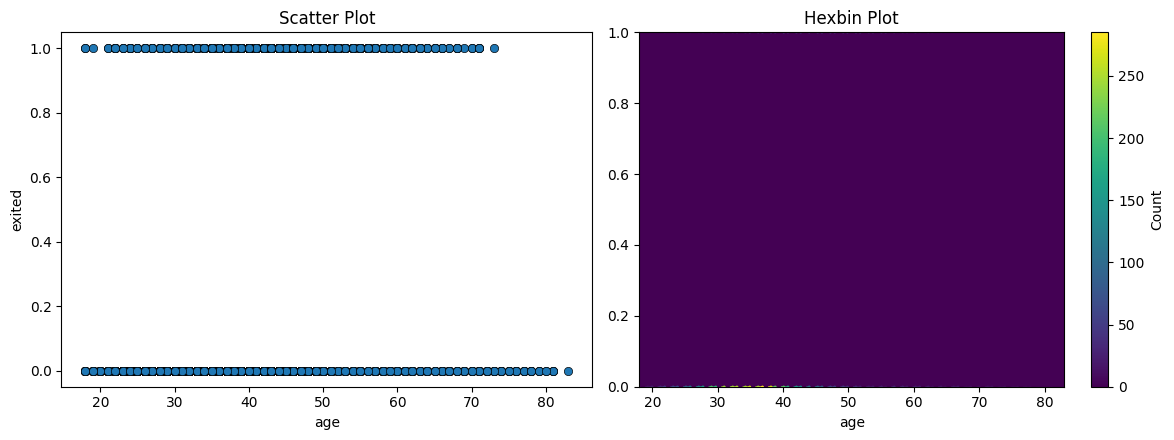

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.27880917545126177
- p-value              : 1.339470061949333e-114
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables age and exited are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.31706541658311804
- p-value              : 1.99437476827716e-149
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables age and exited are correlated


----------------------End Analysis of age---------------------------




----------------------Analysis of tenure---------------------------




0       0
1       1
2       6
3       0
4       6
       ..
6395    3
6396    4
6397    1
6398    5
6399    7
Name: tenure, Length: 6400, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,400 / 6,400 rows


value
percentile       
0             0.0
5             1.0
10            1.0
25            2.0
50            5.0
75            7.0
90            9.0
95            9.0
99           10.0
100          10.0

value
mean                4.982188
trimmed mean (5%)   4.972917
trimmed mean (10%)  4.969531
median              5.000000

value
var            8.291603
std            2.879514
IQR            5.000000
mad            2.000000
coef_variance  0.577962

value
skewness  0.020214
kurtosis -1.144398

Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 4.7072979367968785e-42
Test Statistic       : 0.9503378926933936
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 92.30805682429855
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


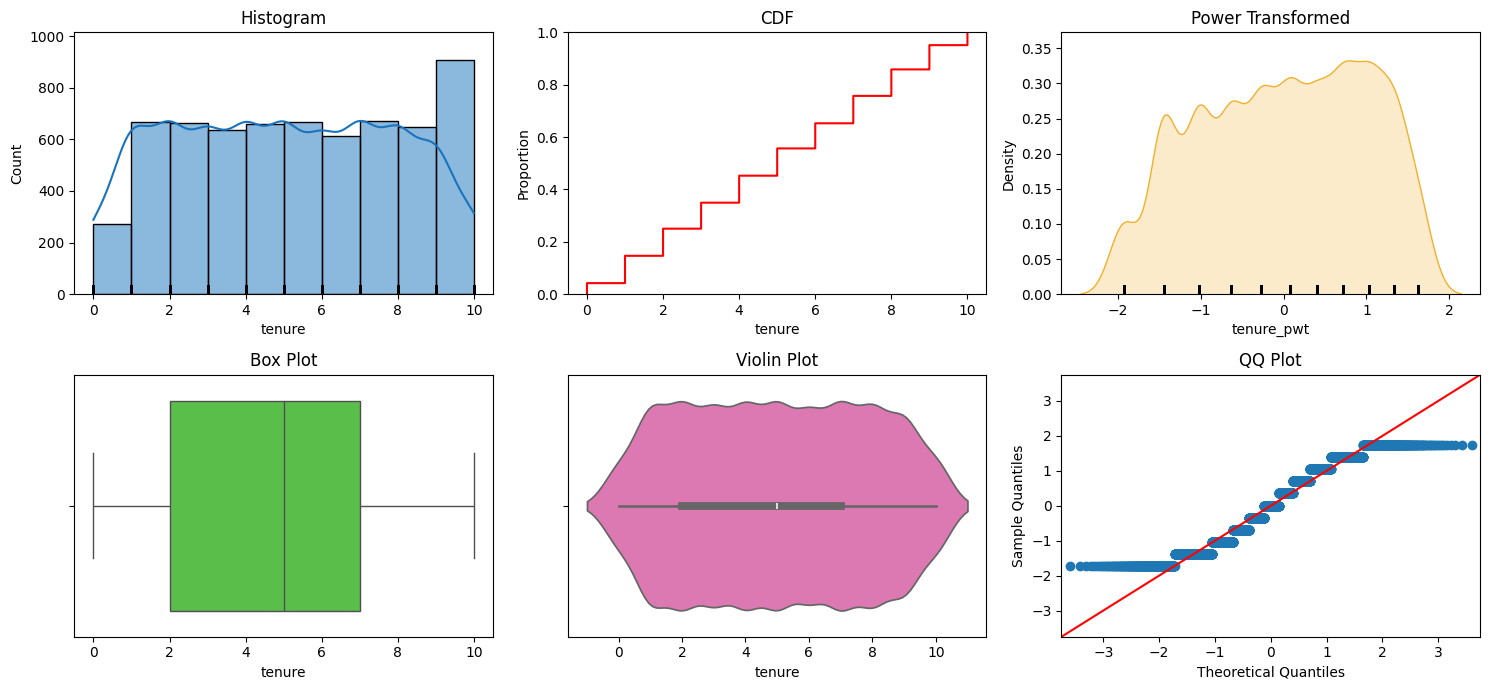

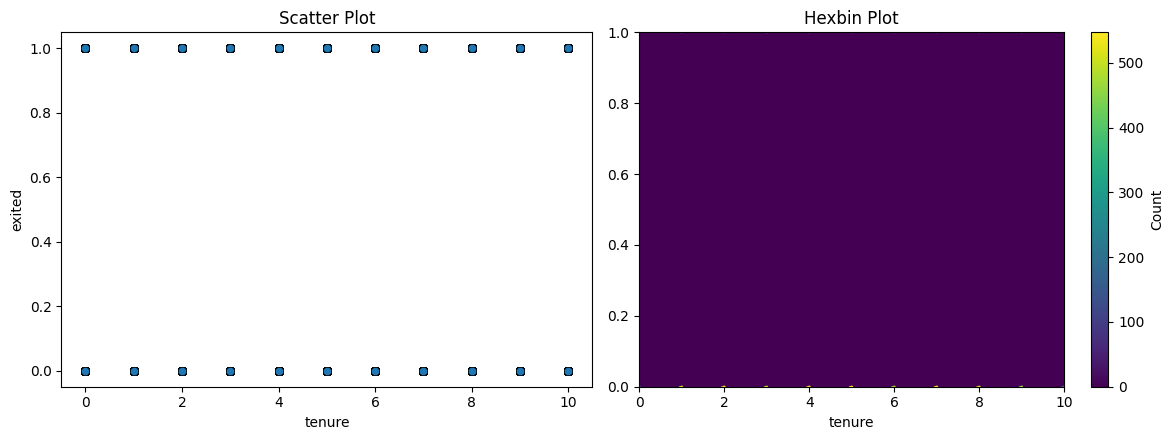

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : -0.009468974772802764
- p-value              : 0.44881804604369296
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables tenure and exited are uncorrelated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : -0.00993757918436101
- p-value              : 0.42668873620735925
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables tenure and exited are uncorrelated


----------------------End Analysis of tenure---------------------------




----------------------Analysis of balance---------------------------




0       127760.07
1       181110.13
2       150358.97
3            0.00
4       100762.64
          ...    
6395         0.00
6396         0.00
6397         0.00
6398         0.00
6399         0.00
Name: balance, Length: 6400, dtype: float64

Data Type      : float64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,400 / 6,400 rows


value
percentile             
0                0.0000
5                0.0000
10               0.0000
25               0.0000
50           96292.5200
75          127638.0275
90          149965.3630
95          163552.5075
99          185932.5246
100         238387.5600

value
mean                76243.429923
trimmed mean (5%)   74847.503028
trimmed mean (10%)  74465.825568
median              96292.520000

value
var            3.911191e+09
std            6.253951e+04
IQR            1.276380e+05
mad            4.841047e+04
coef_variance  8.202610e-01

value
skewness -0.128604
kurtosis -1.492407

Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.1623484338768222e-61
Test Statistic       : 0.8460908245770575
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 414.3803916362631
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


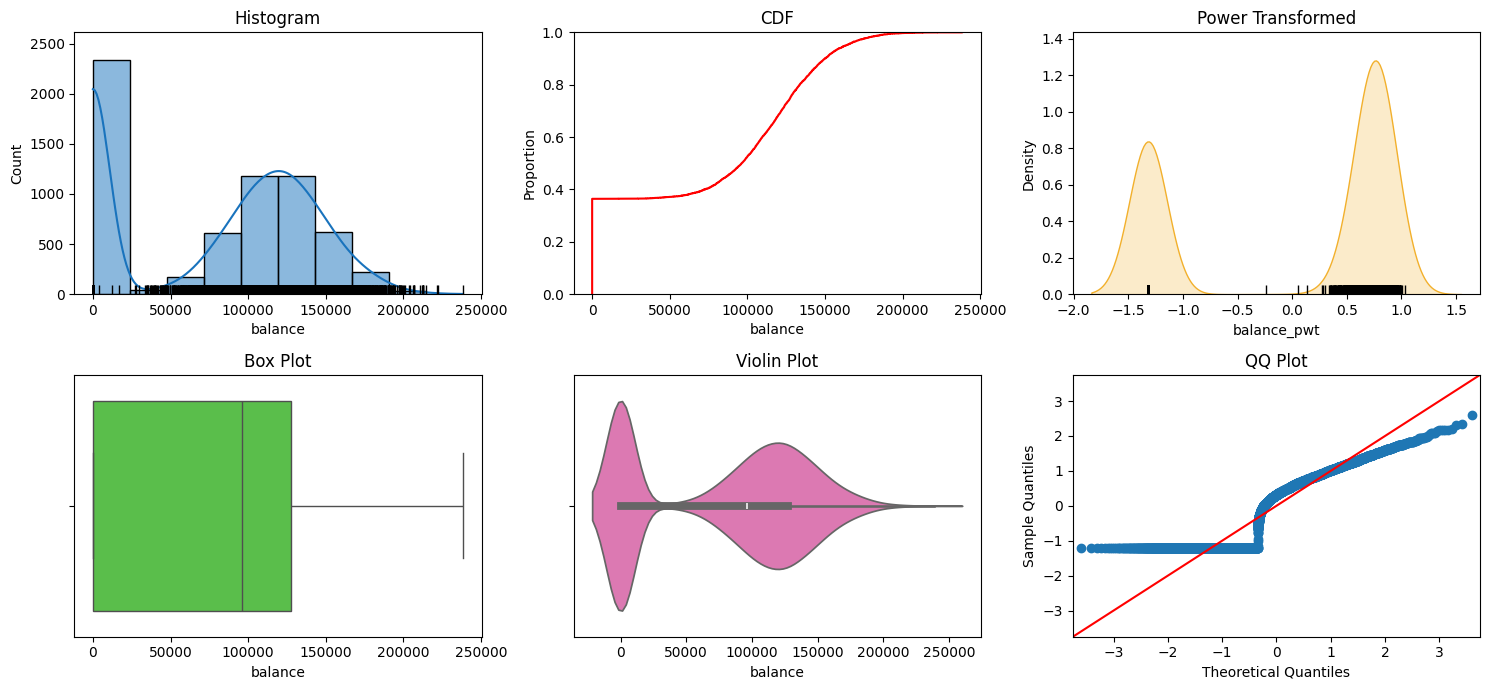

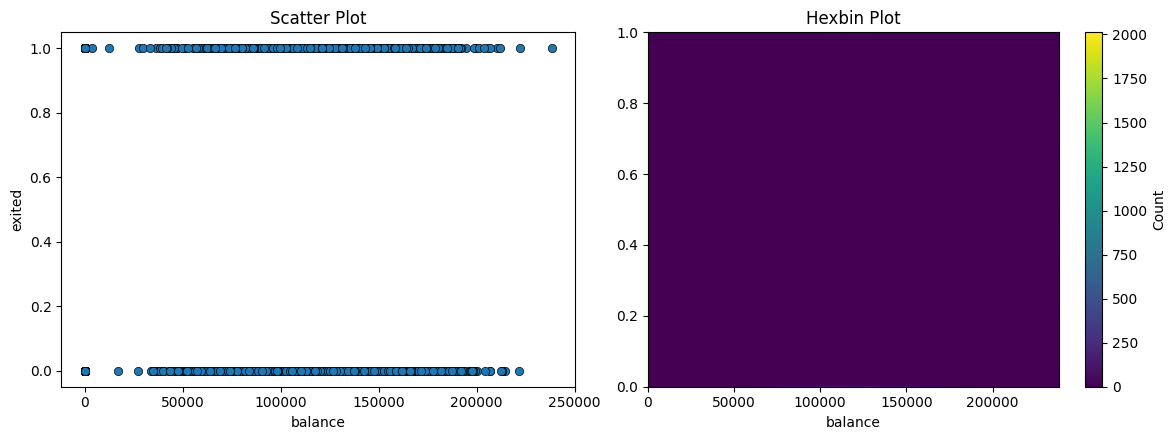

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.11994280878520464
- p-value              : 6.0710258215628185e-22
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables balance and exited are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.11240707413060608
- p-value              : 1.8911131339401922e-19
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables balance and exited are correlated


----------------------End Analysis of balance---------------------------




----------------------Analysis of numofproducts---------------------------




0       1
1       2
2       1
3       2
4       1
       ..
6395    1
6396    2
6397    2
6398    2
6399    2
Name: numofproducts, Length: 6400, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,400 / 6,400 rows


value
percentile       
0             1.0
5             1.0
10            1.0
25            1.0
50            1.0
75            2.0
90            2.0
95            2.0
99            3.0
100           4.0

value
mean                1.533906
trimmed mean (5%)   1.494792
trimmed mean (10%)  1.494141
median              1.000000

value
var            0.337341
std            0.580810
IQR            1.000000
mad            0.000000
coef_variance  0.378648

value
skewness  0.717606
kurtosis  0.492839

Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.658714502538726e-74
Test Statistic       : 0.7075867138315458
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 860.1369513249265
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


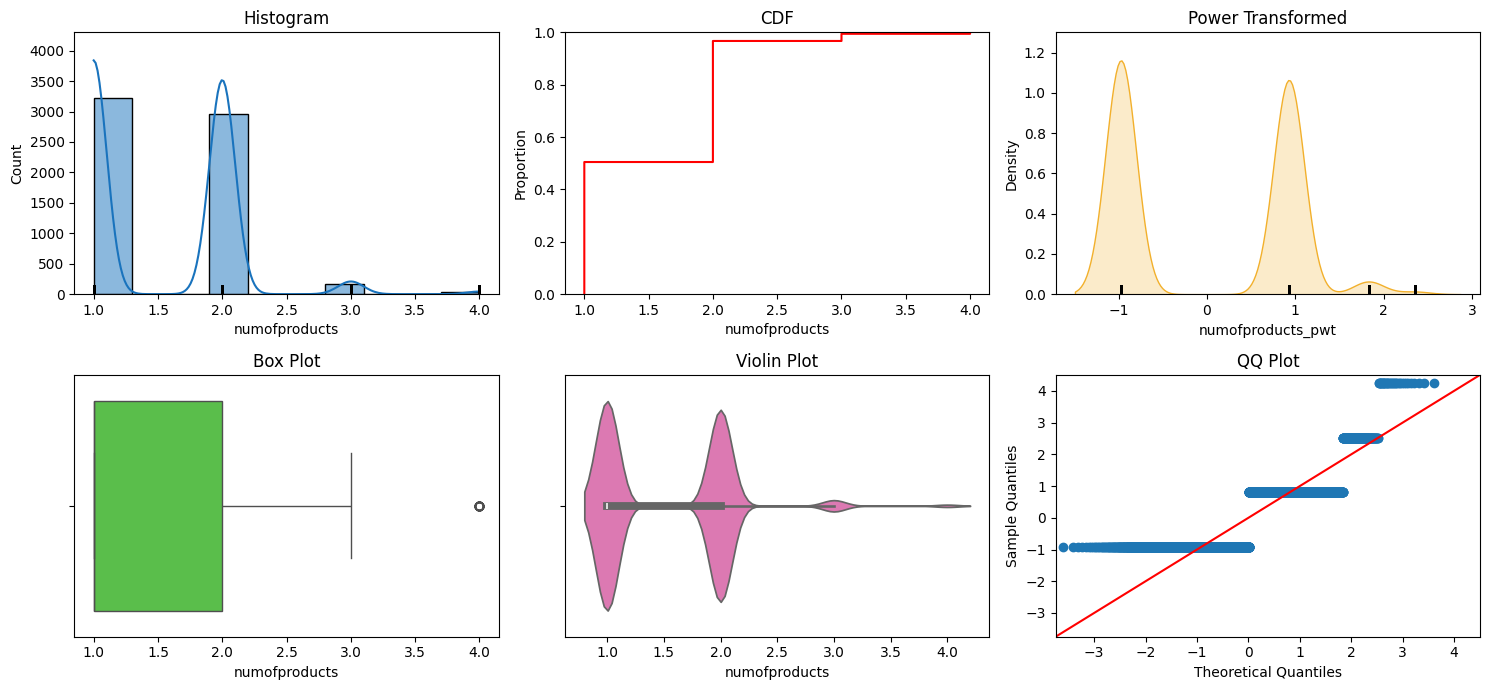

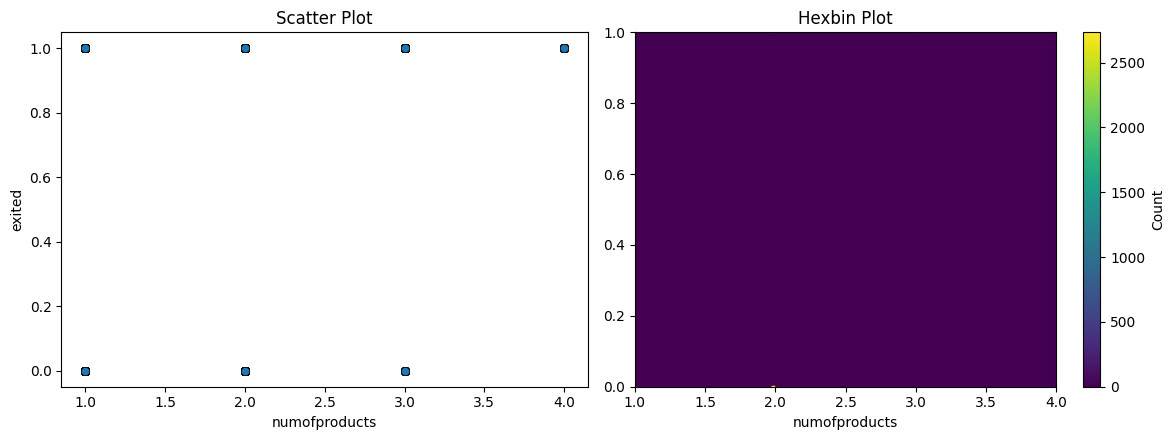

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : -0.048684187968314765
- p-value              : 9.76795997382009e-05
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables numofproducts and exited are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : -0.12532565050854716
- p-value              : 7.986044793796507e-24
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables numofproducts and exited are correlated


----------------------End Analysis of numofproducts---------------------------




----------------------Analysis of hascrcard---------------------------




0       1
1       1
2       1
3       1
4       1
       ..
6395    1
6396    1
6397    0
6398    1
6399    0
Name: hascrcard, Length: 6400, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,400 / 6,400 rows


value
percentile       
0             0.0
5             0.0
10            0.0
25            0.0
50            1.0
75            1.0
90            1.0
95            1.0
99            1.0
100           1.0

value
mean                0.702500
trimmed mean (5%)   0.725000
trimmed mean (10%)  0.753125
median              1.000000

value
var            0.209026
std            0.457194
IQR            1.000000
mad            0.000000
coef_variance  0.650810

value
skewness -0.886115
kurtosis -1.215180

Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 1.2940602749692047e-82
Test Statistic       : 0.5740520797294935
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 1402.8772051945816
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


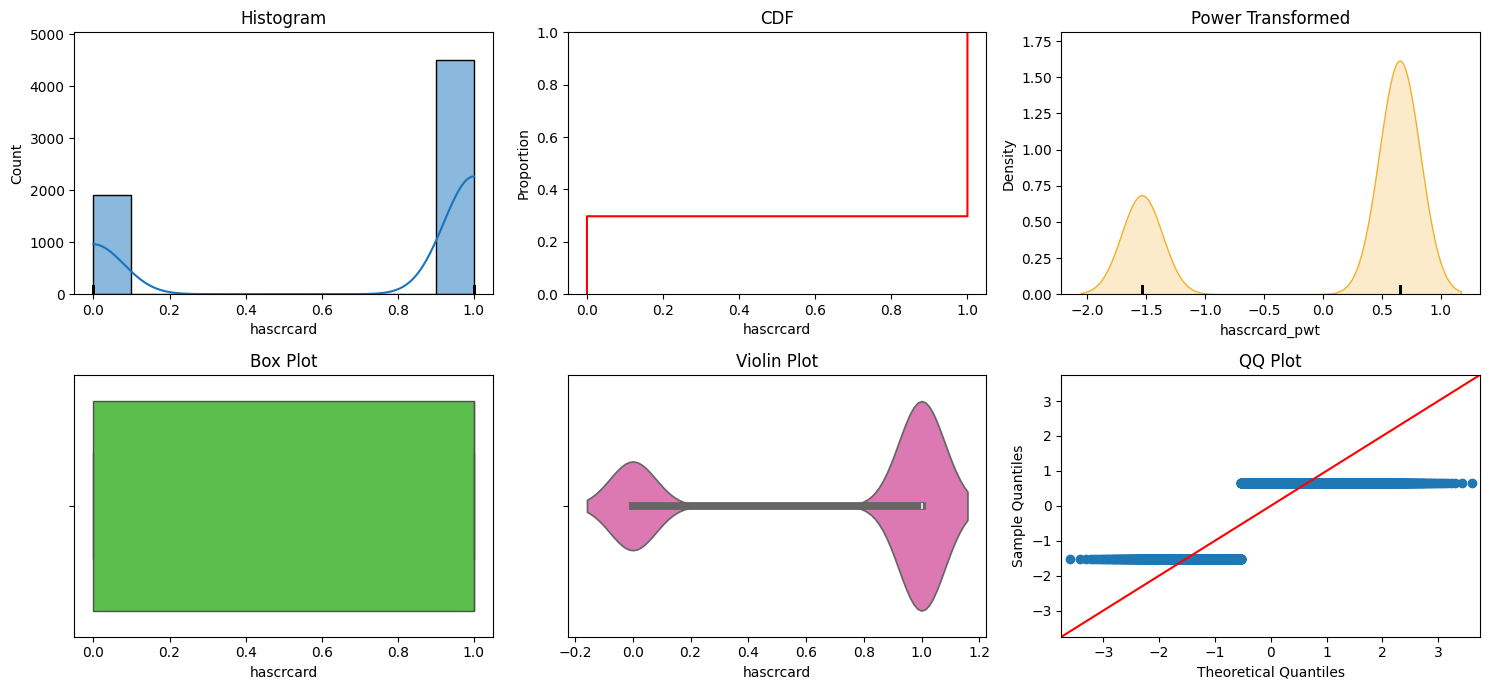

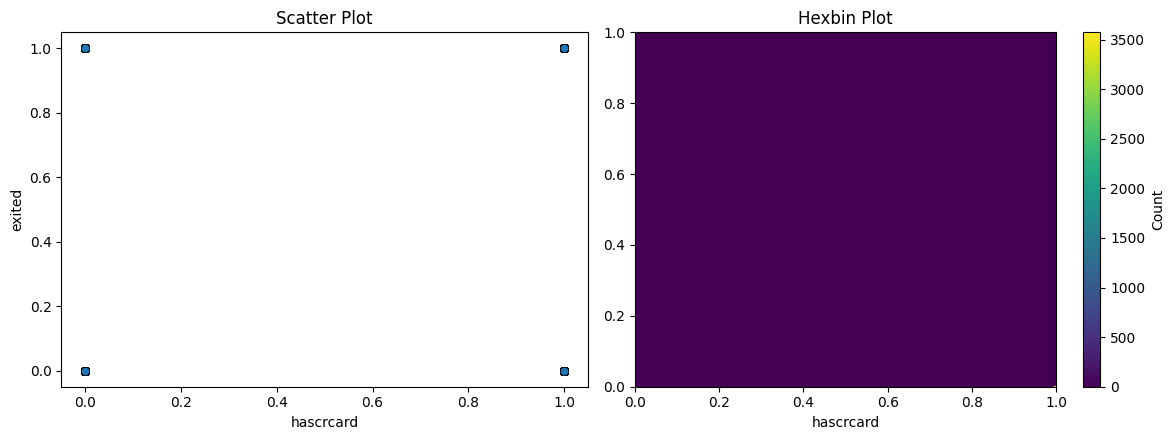

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : -0.0026990523885331835
- p-value              : 0.8290794103316923
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables hascrcard and exited are uncorrelated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : -0.0026990523885331865
- p-value              : 0.8290794103316824
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables hascrcard and exited are uncorrelated


----------------------End Analysis of hascrcard---------------------------




----------------------Analysis of isactivemember---------------------------




0       0
1       0
2       0
3       0
4       0
       ..
6395    0
6396    0
6397    0
6398    0
6399    1
Name: isactivemember, Length: 6400, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,400 / 6,400 rows


value
percentile       
0             0.0
5             0.0
10            0.0
25            0.0
50            1.0
75            1.0
90            1.0
95            1.0
99            1.0
100           1.0

value
mean                0.515938
trimmed mean (5%)   0.517708
trimmed mean (10%)  0.519922
median              1.000000

value
var            0.249785
std            0.499785
IQR            1.000000
mad            0.000000
coef_variance  0.968693

value
skewness -0.063797
kurtosis -1.996554

Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 3.6887004565752544e-79
Test Statistic       : 0.6362557389945278
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 1151.1016171489518
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


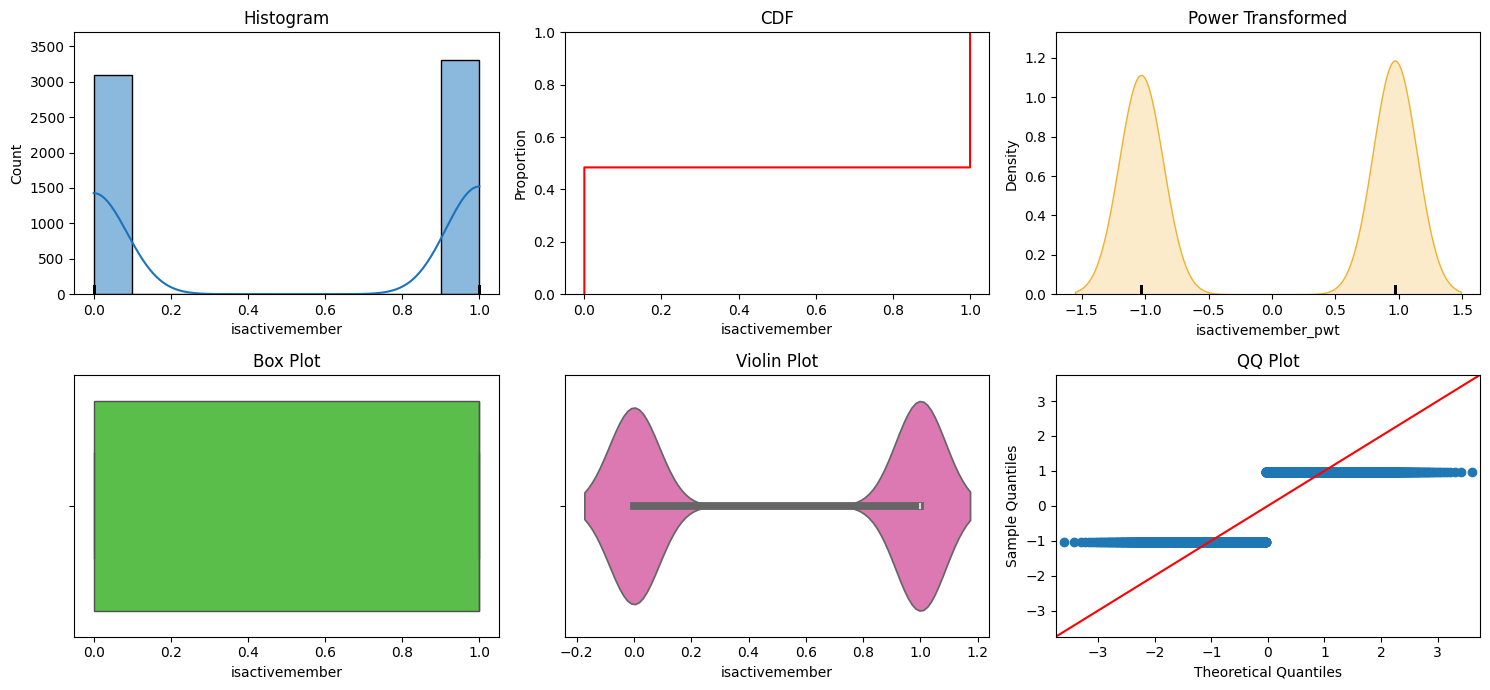

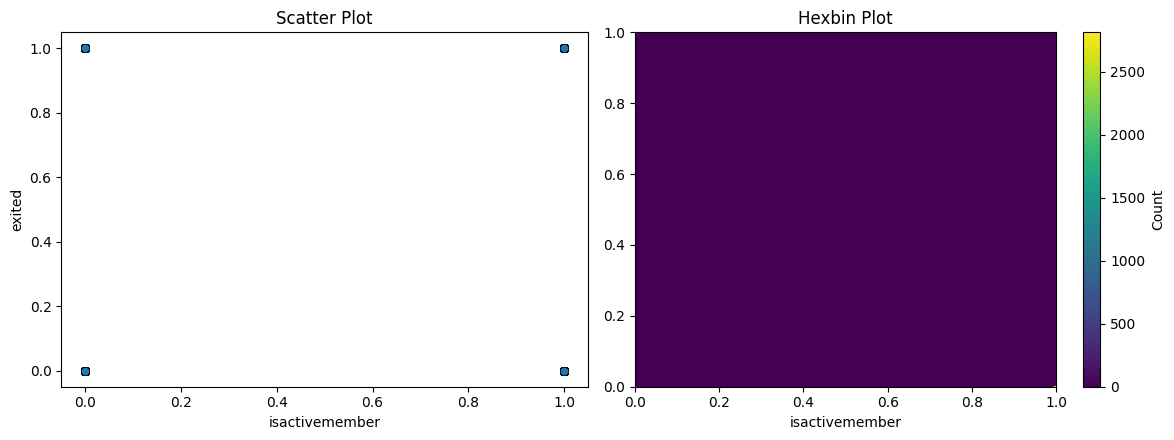

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : -0.14809594962825637
- p-value              : 1.036074631415394e-32
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables isactivemember and exited are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : -0.14809594962825642
- p-value              : 1.0360746314152151e-32
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables isactivemember and exited are correlated


----------------------End Analysis of isactivemember---------------------------




----------------------Analysis of estimatedsalary---------------------------




0        81537.85
1       184544.59
2        62454.01
3        44165.84
4       182156.86
          ...    
6395    193984.60
6396    137402.27
6397     92865.41
6398     95009.60
6399    156598.23
Name: estimatedsalary, Length: 6400, dtype: float64

Data Type      : float64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,400 / 6,400 rows


value
percentile             
0               90.0700
5             9855.7555
10           20556.1930
25           51385.5500
50          100038.1650
75          149539.7150
90          179920.4500
95          190574.6440
99          198091.9251
100         199970.7400

value
mean                100297.819319
trimmed mean (5%)   100323.111969
trimmed mean (10%)  100339.132590
median              100038.165000

value
var            3.306003e+09
std            5.749785e+04
IQR            9.815416e+04
mad            4.911386e+04
coef_variance  5.732712e-01

value
skewness  0.001995
kurtosis -1.181771

Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 5.9040252271598685e-40
Test Statistic       : 0.9566561047068961
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 66.95006736686992
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


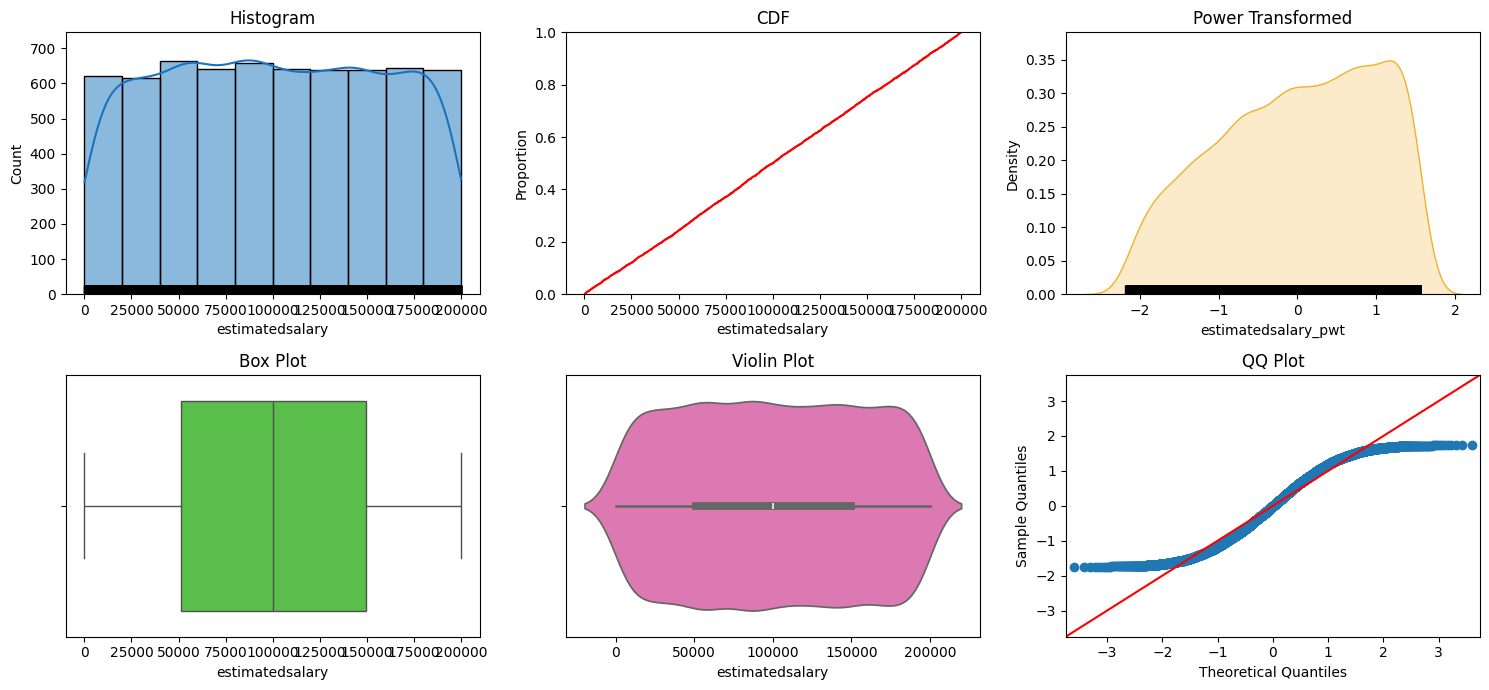

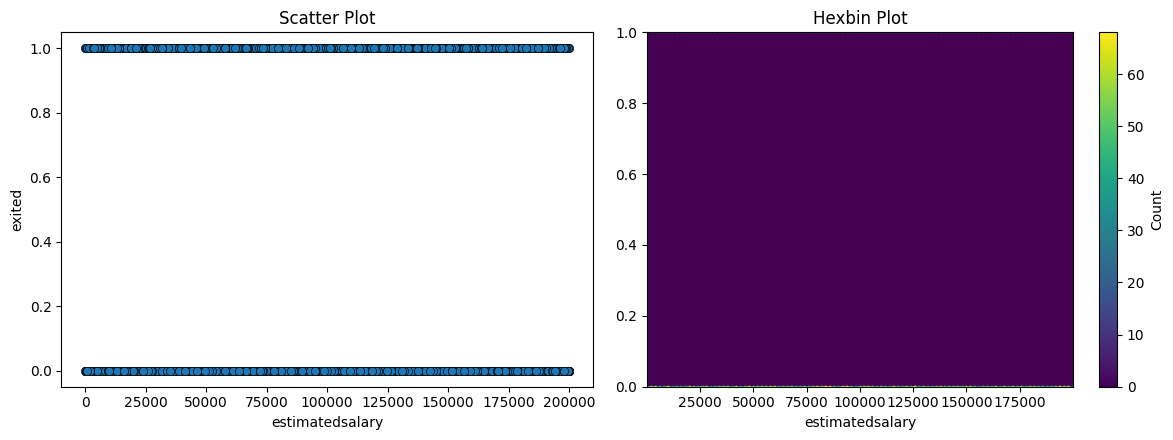

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.00258527185894213
- p-value              : 0.8361803518930525
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables estimatedsalary and exited are uncorrelated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.002607758772604345
- p-value              : 0.8347758855447591
- Since p-value is greater than 0.05, we Fail to Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables estimatedsalary and exited are uncorrelated


----------------------End Analysis of estimatedsalary---------------------------




In [77]:
EDA(train,"exited")